## Librerías

In [1]:
import pandas as pd
import my_utils as ut

## Metodología de Trabajo

En este archivo se utilizarán diversas librerías de Python que nos permiten realizar un análisis general y exhaustivo del dataset. Esto incluye métricas para la calidad de los datos, así como algunas gráficas que nos permitirán entender mejor los datos con los que estamos trabajando. Todos los hallazgos relevantes obtenidos en este notebook serán luego presentados de forma más ordenada en un reporte en formato MarkDown.

En este reporte de calidad buscaremos evaluar las siguientes 3 dimensiones de calidad de los datos:

* Completitud
* Unicidad
* Validez

Estas dimensiones se evaluarán tanto para el **dataframe**, como para sus **columnas** de forma individual. Dadas las características de esta prueba técnica, quedan fuera del alcance de este reporte las siguientes dimensiones de calidad:

* Precisión: Se requiere una fuente secundaria de información con el fin de confirmar y contrastar la veracidad de los datos. Si los datos provienen de la API de spotify, doy por sentada su veracidad ya que la información es cargada por los mismos artistas/disqueras (Aún así está sujeta a error).
* Temporalidad: No se están manejando series de tiempo en este dataset, así que se omite.
* Consistencia: Se requiere una base de datos secundaria con el fin de calcular la consistencia. Se podría usar la información de la API de Deezer, por ejemplo, para verificar si la información del artista y de sus canciones es homogénea. Sin embargo, esto puede causar sesgos de percepción en la información, ya que puede que un artista no paute en ambas plataformas o que sea selectivo con el contenido que sube a cada una.

## Evaluación de Calidad - Dataset

Instanciamos el .csv creado en el archivo 'ETL.ipynb' y revisamos su contenido para verificar que la información es la correcta.

In [2]:
df = pd.read_csv('data/taylor_swift_spotify.csv')
df.head()

,disc_number,duration_ms,explicit,track_number,track_popularity,track_id,track_name,audio_features.danceability,audio_features.energy,audio_features.key,...,audio_features.tempo,audio_features.id,audio_features.time_signature,album_id,album_name,album_release_date,album_total_tracks,artist_id,artist_name,artist_popularity
0,1,212600,False,1,77,4WUepByoeqcedHoYhSNHRt,Welcome To New York (Taylor's Version),0.757,0.610,7.0,...,116.998,4WUepByoeqcedHoYhSNHRt,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
1,1,231833,False,2,78,0108kcWLnn2HlH2kedi1gn,Blank Space (Taylor's Version),0.733,0.733,0.0,...,96.057,0108kcWLnn2HlH2kedi1gn,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
2,1,231000,False,3,79,3Vpk1hfMAQme8VJ0SNRSkd,Style (Taylor's Version),0.511,0.822,11.0,...,94.868,3Vpk1hfMAQme8VJ0SNRSkd,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
3,1,235800,False,4,78,1OcSfkeCg9hRC2sFKB4IMJ,Out Of The Woods (Taylor's Version),0.545,0.885,0.0,...,92.021,1OcSfkeCg9hRC2sFKB4IMJ,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120
4,1,193289,False,5,77,2k0ZEeAqzvYMcx9Qt5aClQ,All You Had To Do Was Stay (Taylor's Version),0.588,0.721,0.0,...,96.997,2k0ZEeAqzvYMcx9Qt5aClQ,4.0,1o59UpKw81iHR0HPiSkJR0,1989 (Taylor's Version) [Deluxe],2023-10-27,22,06HL4z0CvFAxyc27GX,Taylor Swift,120


Ahora corroboramos el número de filas y columnas de nuestro dataframe. Esta información será parte del primer apartado del reporte que elaboraremos, en el que detallamos la metadata e información general de nuestro dataframe. El método `shape()` nos retorna una tupla con el número de filas y columnas de nuestro dataframe.

* Filas (Entradas): 575
* Columnas (Dimensiones): 27

In [3]:
filas_df = df.shape[0]
columnas_df = df.shape[1]

print(f'''El dataframe tiene:
    * Filas: {filas_df}
    * Columnas: {columnas_df}
      ''')

El dataframe tiene:
    * Filas: 575
    * Columnas: 27
      


### Métricas de Evaluación de Calidad

Conociendo el tamaño de las dimensiones de nuestro dataframe, podemos evaluar la calidad del mismo mediante las métricas de completitud y unicidad. Para la primera métrica evaluaremos el porcentaje de campos nulos con respecto al total de campos de nuestro dataset. Para la segunda evaluaremos el porcentaje de filas únicas con respecto al total de filas del dataset.

#### Completitud

Para calcular la completitud del dataset podemos usar la siguiente formula matemática:

$$
Completitud = \frac{\text{Campos no faltantes}}{\text{Campos totales}}*100
$$

Con el fin de conocer la cantidad de campos no faltantes podemos usar el método `notna()` de pandas en conjunción con el método `sum()`. `notna()` nos retorna un dataframe booleano con las mismas dimensiones del original asignando **True** a los valores no nulos y **False** a los nulos. Si utilizamos la función `sum()` en este dataframe 2 veces, estaremos sumando ambas dimensiones del dataframe (Filas y columnas), lo cual nos retornará el número total de **Campos no nulos**.

In [4]:
campos_notna = df.notna().sum().sum()
print(f'El número de campos no nulos del dataframe es: {campos_notna}')

El número de campos no nulos del dataframe es: 15436


Ahora para hallar el número de campos totales solo debemos multiplicar las filas por las columnas de nuestro dataframe.

In [5]:
campos_totales = filas_df * columnas_df
print(f'El número de campos totales del dataframe es de: {campos_totales}')

El número de campos totales del dataframe es de: 15525


Reemplazando las variables obtenemos la siguiente formula:

$$
Completitud = \frac{15436}{15525}*100
$$

In [6]:
completitud_df = round((campos_notna/campos_totales) * 100, 2)
print(f'El dataframe está un {completitud_df}% completo')

El dataframe está un 99.43% completo


Finalmente podemos obtener el número de campos nulos restando los totales menos los faltantes.

In [7]:
nulos_df = campos_totales - campos_notna
print(f'El número de campos nulos en el dataframe es de: {nulos_df}')

El número de campos nulos en el dataframe es de: 89


#### Unicidad

Para calcular la unicidad podemos usar la siguiente fórmula matemática:

$$
Unicidad = \frac{\text{Filas no duplicadas}}{\text{Filas totales}}*100
$$

Para calcular el número de filas no duplicadas restaremos a las 575 filas de nuestro dataframe, el número de filas duplicadas. Para encontrar el número de filas duplicadas podemos usar una máscara booleana para filtrar nuestro dataframe mediante el método `duplicated()`, este método retorna un arreglo booleano con dimensiones (575, 1). Si aplicamos este arreglo como una máscara a nuestro dataframe original filtraremos las filas que están duplicadas. Finalmente, con la función `len()` calculamos el número de filas en nuestro dataframe filtrado, retornando así el número de filas duplicadas.

In [8]:
filas_duplicadas = len(df[df.duplicated()])
filas_no_duplicadas = filas_df - filas_duplicadas
print(f'El número de filas no duplicadas es de: {filas_no_duplicadas}')

El número de filas no duplicadas es de: 521


Reemplazando los valores obtenemos la siguiente fórmula:

$$
Unicidad = \frac{521}{575}*100
$$

In [9]:
unicidad = round((filas_no_duplicadas/filas_df) * 100,2)
print(f'El dataframe contiene un {unicidad}% de filas únicas')

El dataframe contiene un 90.61% de filas únicas


## Evaluación de Calidad - Columnas

Una vez evaluado el dataset pasaremos a evaluar la calidad de los datos contenidos por cada columna teniendo en cuenta las dimensiones de completitud, unicidad y validez. Para corroborar la validez de los datos es apropiado crear un diccionario que contenga la metadata relevante de cada una de las columnas del dataset. Esta metadata puede incluir la siguiente información:

* Nombre de la columna
* Descripción del contenido
* Tipo de dato que contiene
* Clase (Categórica / Cuantitativa)
* Sub-Clase (Nominal / Ordinal - Discreta / Continua)
* Mínimo (Si aplica)
* Máximo (Si aplica)
* Formato (Si aplica)

Toda la metadata será extraida de la [documentación](https://developer.spotify.com/documentation/web-api/reference/get-track) de la **API de Spotify** en la medida de lo posible y se realizará una tabla que contenga la información resumida en un archivo **.xslx**. Este archivo se utilizará como un dataframe para automatizar algunos procesos de la validación de los datos.

In [10]:
metadata = pd.read_excel('data/dataset-metadata.xlsx', sheet_name='Metadata')
metadata

,COLUMNA,DESCRIPCION,TIPO,CLASE,SUB-CLASE,MINIMO,MAXIMO,FORMATO
0,disc_number,Número de discos (Físicos o digitales) para un...,Integer,Cuantitativa,Discreta,1.0,NaN,Cantidad
1,duration_ms,Duración de la pista,Integer,Cuantitativa,Discreta,1.0,NaN,Milisegundos
2,explicit,Determina si la pista tiene contenido explícito,Boolean,Cualitativa,Nominal,0.0,1.0,NaN
3,track_number,El número de la pista,Integer,Cuantitativa,Discreta,0.0,NaN,Enumeración
4,track_popularity,La popularidad de la pista,Integer,Cuantitativa,Discreta,0.0,100.0,Indicador
5,track_id,El ID de Spotify de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
6,track_name,El nombre de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
7,audio_features.danceability,Determina que tan bailable es una pista,Float,Cuantitativa,Continua,0.0,1.0,Indicador
8,audio_features.energy,Medida perceptual de la intensidad y actividad...,Float,Cuantitativa,Continua,0.0,1.0,Indicador
9,audio_features.key,La clave musical en la que se encuentra la pis...,Integer,Cuantitativa,Discreta,-1.0,11.0,Notación


Ahora que contamos con la data necesaria para evaluar las columnas, podemos empezar con la evaluación de la calidad de los datos.

### Completitud

Para evaluar la completitud y el tipo de datos de las columnas, así como el número de filas duplicadas y totalmente nulas, he utilizado un Script que he desarrollado en anteriores proyectos en los que he trabajado. Este Script me permite visualizar rapidamente el número y porcentaje de datos nulos presentes en cualquier dataframe. Si quieres revisar el código a fondo por favor visita la **librería personalizada** que cree en este mismo repositorio. Ahí alojo algunos Scripts que he ido perfeccionando y que utilizo en casi cualquier proyecto de data. El archivo **my_utils.py** contiene el código y el **my_utils.pyi** los docStrings para las funciones.

Mi objetivo para evaluar la calidad de las columnas es elaborar una tabla que resuma todas las métricas de calidad, así que extraeré los valores de la columna **No_Null_%** en un diccionario que finalmente será mi tabla resumen.

In [39]:
null_review = ut.null_review(df)
null_review


Total rows:  575

Total full null rows:  0

Total duplicated rows: 55


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,disc_number,[<class 'int'>],100.00,575,0.00,0
1,duration_ms,[<class 'int'>],100.00,575,0.00,0
2,explicit,[<class 'bool'>],100.00,575,0.00,0
3,track_number,[<class 'int'>],100.00,575,0.00,0
4,track_popularity,[<class 'int'>],100.00,575,0.00,0
5,track_id,[<class 'str'>],98.61,567,1.39,8
6,track_name,[<class 'str'>],98.78,568,1.22,7
7,audio_features.danceability,[<class 'float'>],99.65,573,0.35,2
8,audio_features.energy,[<class 'float'>],99.65,573,0.35,2
9,audio_features.key,[<class 'float'>],99.83,574,0.17,1


Para elaborar la tabla resumen primero copiaré el dataframe del reporte y luego realizaré un proceso de 'Slicing' a mi dataframe, quedándome solo con las columnas que me interesan.

In [40]:
resumen = null_review.copy()

resumen = resumen[['Column', 'No_Null_%']]
resumen.head()

,Column,No_Null_%
0,disc_number,100.0
1,duration_ms,100.0
2,explicit,100.0
3,track_number,100.0
4,track_popularity,100.0


Ahora renombraré las columnas en español y utilizaré un nombre más apropiado.

In [41]:
resumen.rename(columns={'Column': 'COLUMNA', 'No_Null_%': 'NO_NULOS'}, inplace=True)
resumen

,COLUMNA,NO_NULOS
0,disc_number,100.00
1,duration_ms,100.00
2,explicit,100.00
3,track_number,100.00
4,track_popularity,100.00
5,track_id,98.61
6,track_name,98.78
7,audio_features.danceability,99.65
8,audio_features.energy,99.65
9,audio_features.key,99.83


#### Espacios en Blanco

Si bien la completitud se evalua principalmente mediante los valores nulos, también se debe hacer mediante la medición de los espacios en blanco o strings vacíos **('')** presentes en los datos. Para ello, realicé el Script presentado a continuación, el cual filtra los strings excluyendo los datos tipo **float** e **int** mediante la función `select_dtypes()`. Posteriormente, elimina los valores nulos de cada columna de forma temporal mediante la función `dropna()` y, finalmente, cuenta el número de espacios en blanco existentes en cada columna. Para que el tamaño del string vacío no importe (por ejemplo: '    '), utilizamos la función `strip()`, la cual elimina los espacios en blanco anteriores y posteriores del string que estemos iterando.

In [14]:
def num_bstrings(df) -> int:

    df = df.select_dtypes(exclude=['float64', 'int64'])

    resumen = {}
    valores = []
    columnas = []

    for column in df.columns:
        n=0
        no_null = df[column].dropna()

        for val in no_null:
            if val.strip() == '':
                n+=1

        columnas.append(column)
        valores.append(n)

    resumen['COLUMNA'] = columnas
    resumen['NUM_BLANK_ESP'] = valores

    return pd.DataFrame(resumen)


Para probar si la función retorna el resultado esperado cree este pequeño dataframe de prueba para evaluar los resultados.

In [15]:
dicc = {'Pais': ['Colombia', 'Argentina', ''], 
        'Capital': [None, 'Buenos Aires', 'Santiago'], 
        'Siglas': ['   ', ' ', 'CL'],
        'Ingreso': [1000, 2000, 3000]}

dft = pd.DataFrame(dicc)
dft

,Pais,Capital,Siglas,Ingreso
0,Colombia,None,,1000
1,Argentina,Buenos Aires,,2000
2,,Santiago,CL,3000


In [16]:
num_bstrings(dft)

,COLUMNA,NUM_BLANK_ESP
0,Pais,1
1,Capital,0
2,Siglas,2


Una vez satisfecho con los resultados lo probé en el dataframe original. Como podemos observar no existen espacios en blanco en los strings del dataframe. Cabe resaltar que **hay algunas columnas en el dataframe original que tienen el tipo de dato errado**, como por ejemplo 'album_total_tracks', que no debería aparecer en este reporte. Sin embargo, más adelante evaluaremos los tipos de datos y harémos las acciones correspondientes.

Ya que no existen espacios en blanco, podemos reducir la completitud de las columnas y del dataframe únicamente a la cantidad de valores nulos.

In [17]:
num_bstrings(df)

,COLUMNA,NUM_BLANK_ESP
0,explicit,0
1,track_id,0
2,track_name,0
3,audio_features.instrumentalness,0
4,audio_features.id,0
5,album_id,0
6,album_name,0
7,album_release_date,0
8,album_total_tracks,0
9,artist_id,0


A modo de referencia a continuación se muestran los valores que realmente son Strings, todos están incluídos en el reporte anterior.

In [18]:
metadata[metadata['TIPO'] == 'String']

,COLUMNA,DESCRIPCION,TIPO,CLASE,SUB-CLASE,MINIMO,MAXIMO,FORMATO
5,track_id,El ID de Spotify de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
6,track_name,El nombre de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
18,audio_features.id,El ID de Spotify de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
20,album_id,El ID de Spotify del album,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
21,album_name,El nombre del album (Es un string vacío si el ...,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
22,album_release_date,La fecha en que el album se lanza por primera vez,String,Cualitativa,Ordinal,NaN,NaN,AAAA-MM
24,artist_id,El ID de Spotify del artista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
25,artist_name,El nombre del artista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico


Finalmente añadimos los hallazgos de los strings vacíos a nuestra tabla resumen.

In [42]:
resumen['NO_STR_VACIOS'] = round((575/filas_df) * 100, 2)
resumen

,COLUMNA,NO_NULOS,NO_STR_VACIOS
0,disc_number,100.00,100.0
1,duration_ms,100.00,100.0
2,explicit,100.00,100.0
3,track_number,100.00,100.0
4,track_popularity,100.00,100.0
5,track_id,98.61,100.0
6,track_name,98.78,100.0
7,audio_features.danceability,99.65,100.0
8,audio_features.energy,99.65,100.0
9,audio_features.key,99.83,100.0


### Unicidad

Podemos realizar una evaluación de unicidad para las columnas que contienen un ID, ya que, dependiendo de la fuente de los datos, pueden existir IDs duplicados. La naturaleza de los IDs exige que sean valores únicos, así que vale la pena verificarlos. **album_id** y **artist_id** se pueden repetir ya que fueron desanidados, así que únicamente evaluaremos este aspecto para **track_id** y **audio_features.id**.

In [20]:
ids = metadata[metadata['COLUMNA'].str.endswith('id')]
ids

,COLUMNA,DESCRIPCION,TIPO,CLASE,SUB-CLASE,MINIMO,MAXIMO,FORMATO
5,track_id,El ID de Spotify de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
18,audio_features.id,El ID de Spotify de la pista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
20,album_id,El ID de Spotify del album,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico
24,artist_id,El ID de Spotify del artista,String,Cualitativa,Nominal,NaN,NaN,Alfanumérico


El código presentado a continuación retorna un dataframe con el resumen de los valores únicos para cada columna de ID evaluable. Lo ideal sería que ambas columnas tuvieran 521 valores únicos, ya que previamente encontramos en la evaluación del dataset que habían 54 filas totalmente duplicadas, lo que nos deja de entrada con un total de 521 filas únicas y 54 duplicadas. Para este código utilizamos el método `nunique()` que retorna el número de valores únicos del objeto en el que lo usemos (Dataframe o columna).

In [21]:
columns = ['track_id', 'audio_features.id']
dicc = {}
vals_uniq = []

for col in columns:
    num_uniq = df[col].nunique()
    vals_uniq.append(num_uniq)

dicc['COLUMNA'] = columns
dicc['NUM_UNICOS'] = vals_uniq

result = pd.DataFrame(dicc)

Cómo se puede observar, exiten IDs duplicados que superan en cantidad el total de filas duplicadas. Para ser concretos:

* track_id: 9 duplicados adicionales a los 54 base
* audio_features.id: 2 duplicados adicionales a los 54 base

In [22]:
result

,COLUMNA,NUM_UNICOS
0,track_id,512
1,audio_features.id,519


### Validez

Ahora pasaremos a evaluar la validez de los datos, en concreto, su tipo, rango y formato. Para esto nos apoyaremos en la tabla de metadatos que creamos anteriormente y realizaremos las verificaciones correspondientes. Para poder trabajar con los datos apropiadamente, lo primero será verificar y corregir los tipos de datos. Corregimos el booleano de primeras ya que no necesariamente está mal, sino que pandas cuando exporta la data de un CSV lo suele tomar como String. Si algún dato estuviera mal, nos arrojaría error al momento de realizar la conversión.

In [23]:
df['explicit'] = df['explicit'].astype(bool)

La conversión se realizó exitosamente, así que pasamos a recrear nuevamente nuestro reporte de tipos de datos para verificarlos.

In [24]:
null_review = ut.null_review(df)
null_review = null_review[['Column', 'dType']]
null_review


Total rows:  575

Total full null rows:  0

Total duplicated rows: 55


,Column,dType
0,disc_number,[<class 'int'>]
1,duration_ms,[<class 'int'>]
2,explicit,[<class 'bool'>]
3,track_number,[<class 'int'>]
4,track_popularity,[<class 'int'>]
5,track_id,[<class 'str'>]
6,track_name,[<class 'str'>]
7,audio_features.danceability,[<class 'float'>]
8,audio_features.energy,[<class 'float'>]
9,audio_features.key,[<class 'float'>]


#### Validación de tipos de datos

El siguiente Script validará los tipos de datos del dataset con los de nuestra metadata (Que son los correctos) y nos retornará un dataframe de pandas con la información pertinente. Cabe destacar que estamos utilizando una técnica de mapeo para que los nombres de los tipos hagan match, y, adicionalmente, estamos iterando en el reporte de nulos y en la metadata de forma simultánea para validar los tipos. Si el tipo de dato es el correcto, añadimos '100' a la columna, de lo contrario, añadimos '0'.

In [44]:
map = {"[<class 'int'>]": 'Integer', "[<class 'str'>]": 'String', "[<class 'float'>]": 'Float', "[<class 'bool'>]": 'Boolean'}
my_dict = {"COLUMNA": list(df.columns), "TIPO_VALIDO": []}

for i in range(len(null_review)):
    tipo_dataset = str(null_review['dType'].iloc[i])
    tipo_esperado = metadata['TIPO'].iloc[i]

    if map[tipo_dataset] == tipo_esperado:
        my_dict['TIPO_VALIDO'].append(100)
    else:
        my_dict['TIPO_VALIDO'].append(0)

resultado = pd.DataFrame(my_dict)
resultado

,COLUMNA,TIPO_VALIDO
0,disc_number,100
1,duration_ms,100
2,explicit,100
3,track_number,100
4,track_popularity,100
5,track_id,100
6,track_name,100
7,audio_features.danceability,100
8,audio_features.energy,100
9,audio_features.key,0


Finalmente añadimos los resultados a nuestra tabla resumen, que servirá como un cuadro de mando para verificar rápidamente las dimensiones de calidad de cada una de las columnas.

In [45]:
resumen['TIPO_VALIDO'] = resultado['TIPO_VALIDO']
resumen

,COLUMNA,NO_NULOS,NO_STR_VACIOS,TIPO_VALIDO
0,disc_number,100.00,100.0,100
1,duration_ms,100.00,100.0,100
2,explicit,100.00,100.0,100
3,track_number,100.00,100.0,100
4,track_popularity,100.00,100.0,100
5,track_id,98.61,100.0,100
6,track_name,98.78,100.0,100
7,audio_features.danceability,99.65,100.0,100
8,audio_features.energy,99.65,100.0,100
9,audio_features.key,99.83,100.0,0


#### Validación de Rango

Para realizar la validación de rango de forma automática vamos a filtrar los datos y dejar únicamente los de tipo entero o decimal. Luego reseteamos los índices y dejamos únicamente las columnas que necesitamos.

In [46]:
meta_filter = metadata[(metadata['TIPO'] == 'Integer') | (metadata['TIPO'] == 'Float') ]
meta_filter.reset_index(inplace=True, drop=True)
meta_filter = meta_filter[['COLUMNA', 'MINIMO', 'MAXIMO']]

meta_filter

,COLUMNA,MINIMO,MAXIMO
0,disc_number,1.0,NaN
1,duration_ms,1.0,NaN
2,track_number,0.0,NaN
3,track_popularity,0.0,100.0
4,audio_features.danceability,0.0,1.0
5,audio_features.energy,0.0,1.0
6,audio_features.key,-1.0,11.0
7,audio_features.loudness,-60.0,0.0
8,audio_features.mode,0.0,1.0
9,audio_features.speechiness,0.0,1.0


Aplicamos el mismo filtro de columnas al dataframe original.

In [47]:
data_filter = df[meta_filter['COLUMNA']]
data_filter

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.instrumentalness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,album_total_tracks,artist_popularity
0,1,212600,1,77,0.757,0.610,7.0,-4.840,1,0.0327,0.009420,3.66e-05,0.3670,0.685,116.998,4.0,22,120
1,1,231833,2,78,0.733,0.733,0.0,-5.376,1,0.0670,5.000000,0,0.1680,0.701,96.057,4.0,22,120
2,1,231000,3,79,0.511,0.822,11.0,-4.785,0,0.0397,0.000421,0.0197,0.0899,0.305,94.868,4.0,22,120
3,1,235800,4,78,0.545,0.885,0.0,-5.968,1,0.0447,-0.000537,5.59e-05,0.3850,0.206,92.021,4.0,22,120
4,1,193289,5,77,0.588,0.721,0.0,-5.579,1,0.0317,0.000656,0,0.1310,0.520,96.997,4.0,22,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1,201106,11,70,0.668,0.672,2.0,-4.931,1,0.0303,0.111000,0,0.3290,0.539,89.011,4.0,Thirteen,120
571,1,213053,12,60,0.563,0.934,8.0,-3.629,1,0.0646,2.000000,0.000807,0.1030,0.518,143.964,4.0,Thirteen,120
572,1,203226,13,58,0.612,0.394,7.0,-5.723,1,0.0243,0.637000,0,0.1470,0.233,96.001,4.0,Thirteen,120
573,1,220146,14,58,0.483,0.751,4.0,-5.726,1,0.0365,0.003490,0,0.1280,0.268,156.092,4.0,Thirteen,120


El script que se presenta a continuación itera en la metadata y en el dataset. Se convierten los tipos de datos de forma temporal, ya que hay algunos con el tipo erróneo y dada la consigna no debemos modificar los datos. Con la función `pd.to_numeric()` logramos transformar los datos a tipo numérico para que sean comparables mediante las inecuaciones a medida que se iteran. Luego se comparan con los valores máximos y mínimos de la metadata y, finalmente, se almacenan los valores en un dataframe.

In [48]:
my_dict = {'COLUMNA': [], 'FUERA_DE_RANGO': []}

for i in range(len(meta_filter)):
    min_val = pd.to_numeric(meta_filter['MINIMO'].iloc[i], errors='coerce')
    max_val = pd.to_numeric(meta_filter['MAXIMO'].iloc[i], errors='coerce')
    col = meta_filter['COLUMNA'].iloc[i]
    no_null = data_filter[col].dropna()
    n=0

    for val in no_null:
        if pd.isna(max_val):
            if pd.to_numeric(val, errors='coerce') < min_val:
                n+=1
        elif pd.to_numeric(val, errors='coerce') > max_val or pd.to_numeric(val, errors='coerce') < min_val:
            n+=1

    my_dict['COLUMNA'].append(col)
    my_dict['FUERA_DE_RANGO'].append(n)

Obtenemos entonces los resultados de cuántos datos se encuentran fuera de rango por columna! Para visualizar esto mejor y verifcarlo podemos hacer histogramas para todas estas columnas.

In [49]:
resultado = pd.DataFrame(my_dict)
resultado

,COLUMNA,FUERA_DE_RANGO
0,disc_number,0
1,duration_ms,2
2,track_number,0
3,track_popularity,7
4,audio_features.danceability,0
5,audio_features.energy,0
6,audio_features.key,0
7,audio_features.loudness,0
8,audio_features.mode,0
9,audio_features.speechiness,0


Como se puede observar a continuación los histogramas confirman la existencia de datos atípicos. Por ejemplo, en la gráfica de 'duration_ms' se puede apreciar como hay valores en los -200000 y en 0. O por ejemplo, la columna track_popularity que van desde -100 hasta 150 cuando su rango es de 0 a 100.

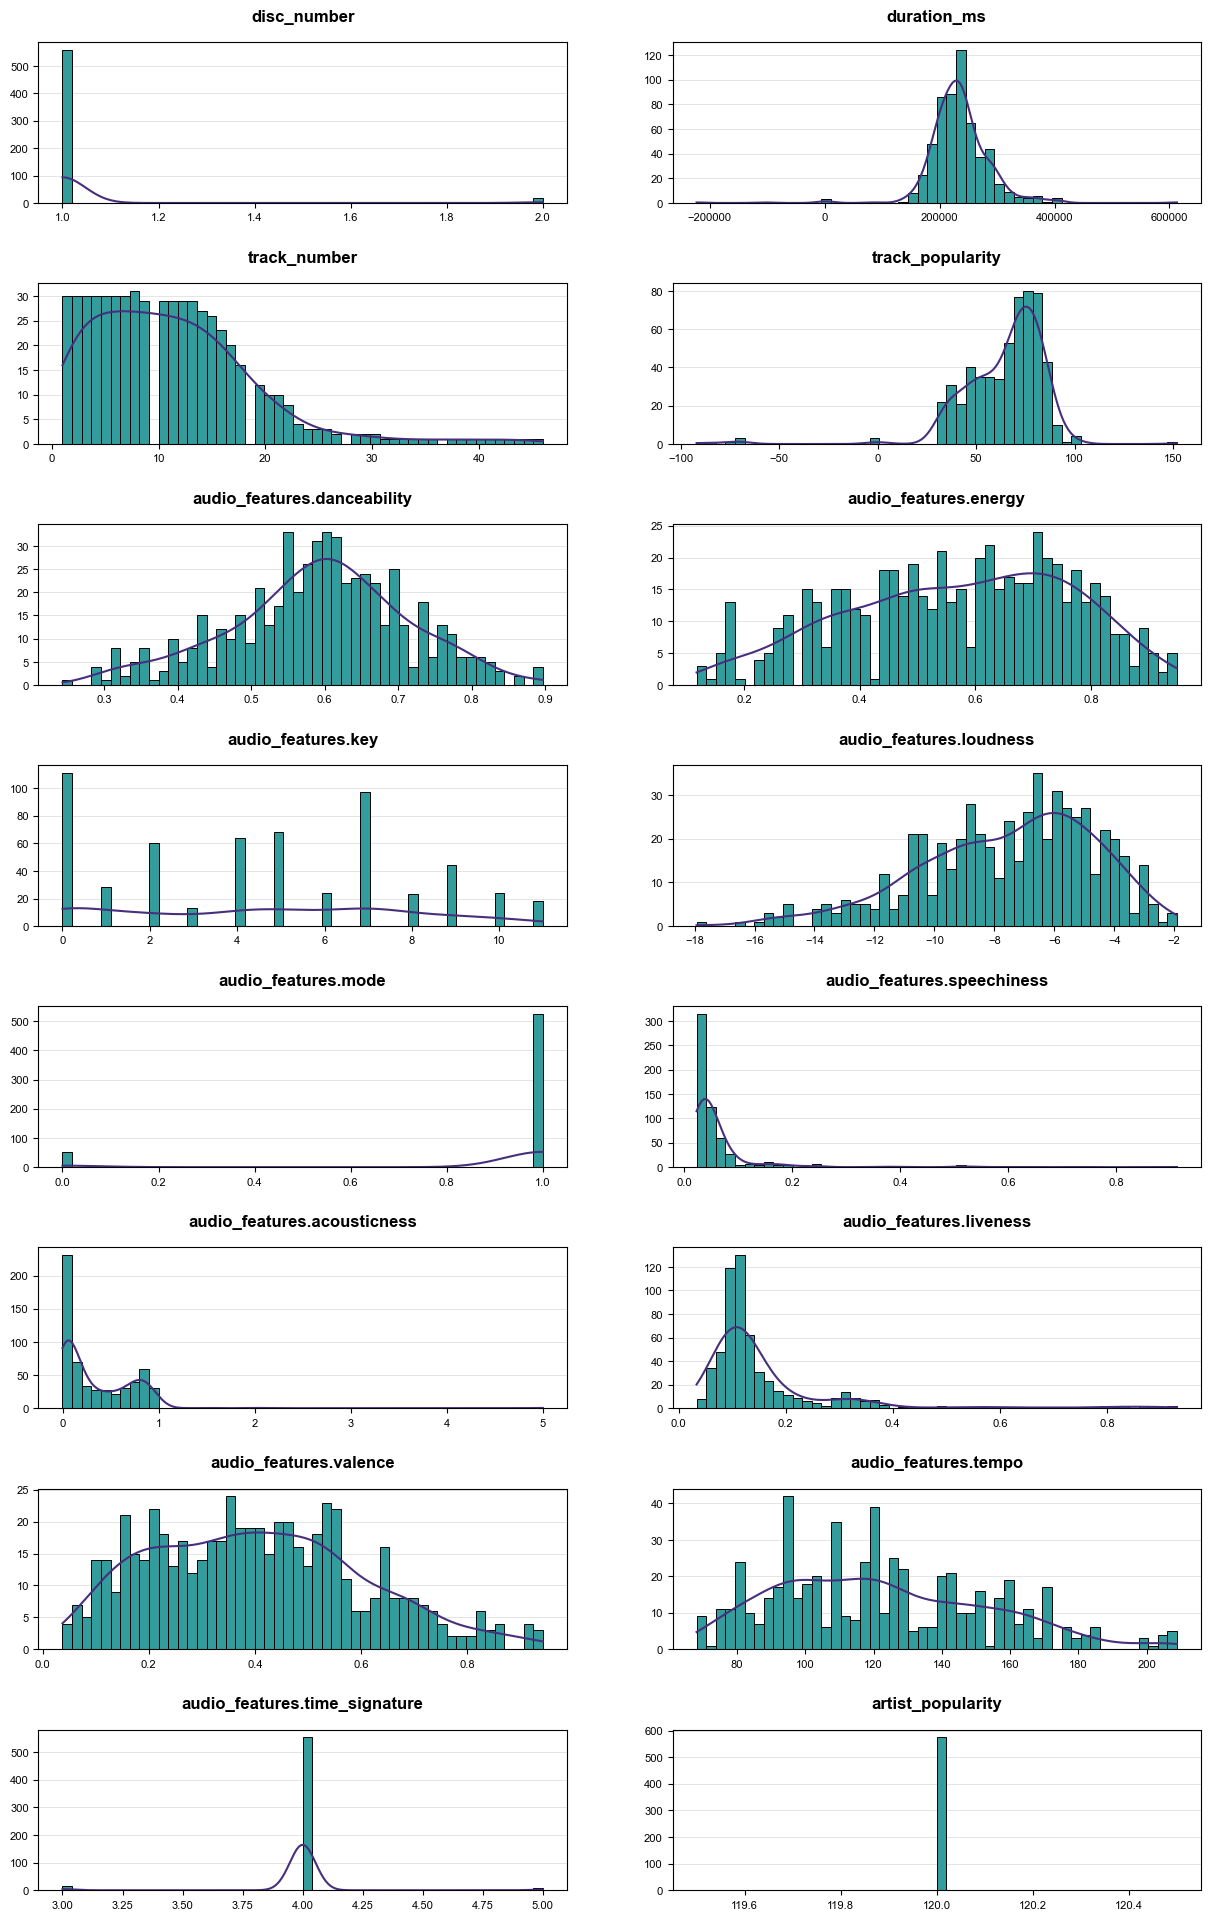

In [31]:
ut.multiHist('data_histograms', df)

Si queremos revisar con exactitud los mínimos, máximos y otras medidas estadísticas relevantes de la data podemos usar el método `describe()`. Este metodo nos retornará la estadística descriptiva de nuestros datos, lo cuál es muy útil para revisar la calidad a fondo si se quiere, cómo por ejemplo, las distribuciones de los datos o medidas de tendencia central y varianza.

In [32]:
df.describe()

,disc_number,duration_ms,track_number,track_popularity,audio_features.danceability,audio_features.energy,audio_features.key,audio_features.loudness,audio_features.mode,audio_features.speechiness,audio_features.acousticness,audio_features.liveness,audio_features.valence,audio_features.tempo,audio_features.time_signature,artist_popularity
count,575.000000,575.000000,575.000000,575.000000,573.000000,573.000000,574.000000,573.000000,575.000000,574.000000,574.000000,574.000000,575.000000,574.000000,574.000000,575.0
mean,1.029565,234136.991304,11.168696,64.113043,0.591702,0.571316,4.571429,-7.551590,0.911304,0.060306,0.337551,0.160293,0.403609,122.212749,3.987805,120.0
std,0.169532,54527.342619,7.832372,22.323237,0.121243,0.192651,3.327544,2.894911,0.284551,0.076884,0.392383,0.138498,0.199124,31.119316,0.191050,0.0
min,1.000000,-223093.000000,1.000000,-92.000000,0.243000,0.118000,0.000000,-17.932000,0.000000,0.023100,-0.003540,0.033500,0.037400,68.097000,3.000000,120.0
25%,1.000000,207440.000000,5.000000,52.500000,0.519000,0.435000,2.000000,-9.375000,1.000000,0.030825,0.034850,0.094800,0.238500,96.068500,4.000000,120.0
50%,1.000000,231706.000000,10.000000,70.000000,0.599000,0.589000,5.000000,-7.031000,1.000000,0.039050,0.163000,0.115000,0.397000,118.962000,4.000000,120.0
75%,1.000000,256741.500000,15.000000,78.000000,0.664000,0.725000,7.000000,-5.398000,1.000000,0.057250,0.664000,0.158000,0.539000,143.950000,4.000000,120.0
max,2.000000,613026.000000,46.000000,152.000000,0.897000,0.949000,11.000000,-1.909000,1.000000,0.912000,5.000000,0.931000,0.943000,208.918000,5.000000,120.0


Ahora bien, calculamos la evaluación del rango previamente obtenida como una medida porcentual para que sea homogenea con los demás indicadores.

In [50]:
resultado['EVAL_RANGO'] = round(((575 - resultado['FUERA_DE_RANGO'])/575) * 100, 2)
resultado

,COLUMNA,FUERA_DE_RANGO,EVAL_RANGO
0,disc_number,0,100.00
1,duration_ms,2,99.65
2,track_number,0,100.00
3,track_popularity,7,98.78
4,audio_features.danceability,0,100.00
5,audio_features.energy,0,100.00
6,audio_features.key,0,100.00
7,audio_features.loudness,0,100.00
8,audio_features.mode,0,100.00
9,audio_features.speechiness,0,100.00


Finalmente, la añadimos al resumen de resultados. Como se puede observar, la mayoría de columnas se encuentran altas en las métricas de calidad. Lo que si es más notorio son las columnas con tipos de datos incorrectos (4) y las filas duplicadas (54). Para visualizar mejor la data realizaremos un mapa de calor de los indicadores obtenidos y, aproximaremos a 0 todo lo que no esté en perfectas condiciones.

In [51]:
resumen = pd.merge(resumen, resultado, on='COLUMNA', how='left')
resumen

,COLUMNA,NO_NULOS,NO_STR_VACIOS,TIPO_VALIDO,FUERA_DE_RANGO,EVAL_RANGO
0,disc_number,100.00,100.0,100,0.0,100.00
1,duration_ms,100.00,100.0,100,2.0,99.65
2,explicit,100.00,100.0,100,NaN,NaN
3,track_number,100.00,100.0,100,0.0,100.00
4,track_popularity,100.00,100.0,100,7.0,98.78
5,track_id,98.61,100.0,100,NaN,NaN
6,track_name,98.78,100.0,100,NaN,NaN
7,audio_features.danceability,99.65,100.0,100,0.0,100.00
8,audio_features.energy,99.65,100.0,100,0.0,100.00
9,audio_features.key,99.83,100.0,0,0.0,100.00


In [53]:
resumen.drop(columns='FUERA_DE_RANGO', inplace=True)

In [54]:
resumen

,COLUMNA,NO_NULOS,NO_STR_VACIOS,TIPO_VALIDO,EVAL_RANGO
0,disc_number,100.00,100.0,100,100.00
1,duration_ms,100.00,100.0,100,99.65
2,explicit,100.00,100.0,100,NaN
3,track_number,100.00,100.0,100,100.00
4,track_popularity,100.00,100.0,100,98.78
5,track_id,98.61,100.0,100,NaN
6,track_name,98.78,100.0,100,NaN
7,audio_features.danceability,99.65,100.0,100,100.00
8,audio_features.energy,99.65,100.0,100,100.00
9,audio_features.key,99.83,100.0,0,100.00


Reemplazamos los nulos por 100, ya que la evaluación de rango no aplica en dichas columnas.

In [55]:
resumen.fillna(100, inplace=True)
resumen

,COLUMNA,NO_NULOS,NO_STR_VACIOS,TIPO_VALIDO,EVAL_RANGO
0,disc_number,100.00,100.0,100,100.00
1,duration_ms,100.00,100.0,100,99.65
2,explicit,100.00,100.0,100,100.00
3,track_number,100.00,100.0,100,100.00
4,track_popularity,100.00,100.0,100,98.78
5,track_id,98.61,100.0,100,100.00
6,track_name,98.78,100.0,100,100.00
7,audio_features.danceability,99.65,100.0,100,100.00
8,audio_features.energy,99.65,100.0,100,100.00
9,audio_features.key,99.83,100.0,0,100.00


In [56]:
resumen.to_excel('data/dataset-evaluacion2.xlsx', index=False)